In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dir = '/content/drive/My Drive/IEEE/NLP Project Agri'
os.listdir(dir)

['datafile_washim_maharashtra.csv', 'datafile_mumbai_maharashtra.csv']

In [0]:
train = pd.read_csv(dir + '/datafile_washim_maharashtra.csv')

In [5]:
train.head()

,Season,Sector,Category,Crop,QueryType,QueryText,KccAns,StateName,DistrictName,BlockName,CreatedOn
0,NaN,AGRICULTURE,Others,Others,Weather,Farmer asking about weather forecast of Block ...,NaN,MAHARASHTRA,WASHIM,WASHIM,2019-10-01T06:28:24.257
1,NaN,AGRICULTURE,Others,Others,Weather,Farmer Asked About Weather Forecast of karnja...,NaN,MAHARASHTRA,WASHIM,KARANJA,2019-10-01T06:36:28.063
2,NaN,AGRICULTURE,Others,Others,Weather,FARMER ASKED ABOUT WEATHER FORECAST OF MALEGA...,NaN,MAHARASHTRA,WASHIM,MALEGAON,2019-10-01T06:53:54.02
3,NaN,AGRICULTURE,Fiber Crops,Cotton (Kapas),\tPlant Protection\t,FARMER ASKED ABOUT ATTACK OF APHIDS ON COTTON ...,NaN,MAHARASHTRA,WASHIM,MALEGAON,2019-10-01T07:37:59.167
4,NaN,HORTICULTURE,Vegetables,Brinjal,Seeds and Planting Material,VARIETIES OF BRINJAL ?\n,NaN,MAHARASHTRA,WASHIM,WASHIM,2019-10-01T07:47:25.36


**Following code snippit is for analysing presence of null or na is dataset**

,Total,Percent
KccAns,2800,1.0
Season,2800,1.0
CreatedOn,0,0.0
BlockName,0,0.0
DistrictName,0,0.0


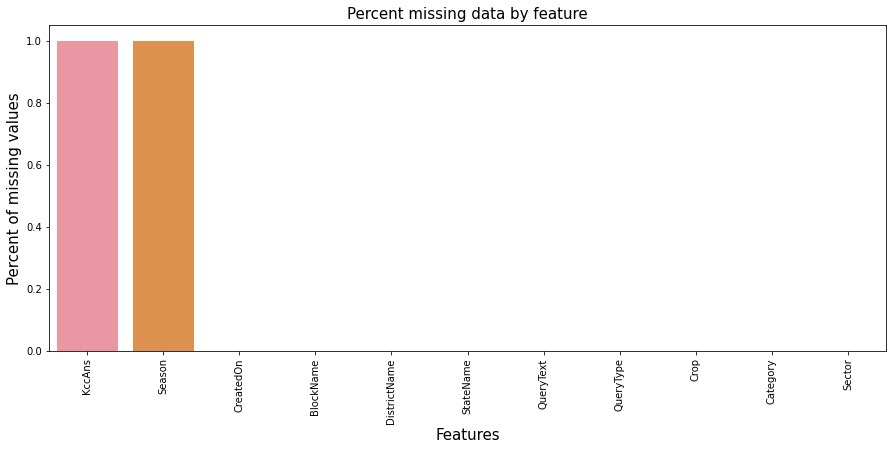

In [6]:
#Finding total missing data

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

**Following Code snippit is for droping unwanted columns**

In [48]:
train1 = train.drop(columns=['KccAns', 'Season', 'QueryText'], axis=1)  #"QueryText is droped as QueryType already denote the Query"
train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,AGRICULTURE,Others,Others,Weather,MAHARASHTRA,WASHIM,WASHIM,2019-10-01T06:28:24.257
1,AGRICULTURE,Others,Others,Weather,MAHARASHTRA,WASHIM,KARANJA,2019-10-01T06:36:28.063
2,AGRICULTURE,Others,Others,Weather,MAHARASHTRA,WASHIM,MALEGAON,2019-10-01T06:53:54.02
3,AGRICULTURE,Fiber Crops,Cotton (Kapas),\tPlant Protection\t,MAHARASHTRA,WASHIM,MALEGAON,2019-10-01T07:37:59.167
4,HORTICULTURE,Vegetables,Brinjal,Seeds and Planting Material,MAHARASHTRA,WASHIM,WASHIM,2019-10-01T07:47:25.36


**Following code snippets are for cleaning QueryType Column**

In [49]:
# Lowercase all characters
train1.Sector = train1.Sector.apply(lambda x: x.lower())
train1.Category = train1.Category.apply(lambda x: x.lower())
train1.Crop = train1.Crop.apply(lambda x: x.lower())
train1.QueryType = train1.QueryType.apply(lambda x: x.lower())
train1.StateName = train1.StateName.apply(lambda x: x.lower())
train1.DistrictName = train1.DistrictName.apply(lambda x: x.lower())
train1.BlockName = train1.BlockName.apply(lambda x: x.lower())

train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,agriculture,others,others,weather,maharashtra,washim,washim,2019-10-01T06:28:24.257
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019-10-01T06:36:28.063
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019-10-01T06:53:54.02
3,agriculture,fiber crops,cotton (kapas),\tplant protection\t,maharashtra,washim,malegaon,2019-10-01T07:37:59.167
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019-10-01T07:47:25.36


In [50]:
# Remove quotes
train1.Sector = train1.Sector.apply(lambda x: re.sub("'", '', x))
train1.Category = train1.Category.apply(lambda x: re.sub("'", '', x))
train1.Crop = train1.Crop.apply(lambda x: re.sub("'", '', x))
train1.QueryType = train1.QueryType.apply(lambda x: re.sub("'", '', x))
train1.StateName = train1.StateName.apply(lambda x: re.sub("'", '', x))
train1.DistrictName = train1.DistrictName.apply(lambda x: re.sub("'", '', x))
train1.BlockName = train1.BlockName.apply(lambda x: re.sub("'", '', x))
train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,agriculture,others,others,weather,maharashtra,washim,washim,2019-10-01T06:28:24.257
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019-10-01T06:36:28.063
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019-10-01T06:53:54.02
3,agriculture,fiber crops,cotton (kapas),\tplant protection\t,maharashtra,washim,malegaon,2019-10-01T07:37:59.167
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019-10-01T07:47:25.36


In [51]:
exclude = list(set(string.punctuation)) # Set of all special characters
exclude.append('\n')
exclude.append('\t')
exclude = set(exclude) 
# Remove all the special characters
train1.Sector = train1.Sector.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
train1.Category = train1.Category.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
train1.Crop = train1.Crop.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
train1.QueryType = train1.QueryType.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
train1.StateName = train1.StateName.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
train1.DistrictName = train1.DistrictName.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
train1.BlockName = train1.BlockName.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,agriculture,others,others,weather,maharashtra,washim,washim,2019-10-01T06:28:24.257
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019-10-01T06:36:28.063
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019-10-01T06:53:54.02
3,agriculture,fiber crops,cotton kapas,plant protection,maharashtra,washim,malegaon,2019-10-01T07:37:59.167
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019-10-01T07:47:25.36


In [52]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', string.digits)
train1.Sector = train1.Sector.apply(lambda x: x.translate(remove_digits))
train1.Category = train1.Category.apply(lambda x: x.translate(remove_digits))
train1.Crop = train1.Crop.apply(lambda x: x.translate(remove_digits))
train1.QueryType = train1.QueryType.apply(lambda x: x.translate(remove_digits))
train1.StateName = train1.StateName.apply(lambda x: x.translate(remove_digits))
train1.DistrictName = train1.DistrictName.apply(lambda x: x.translate(remove_digits))
train1.BlockName = train1.BlockName.apply(lambda x: x.translate(remove_digits))
train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,agriculture,others,others,weather,maharashtra,washim,washim,2019-10-01T06:28:24.257
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019-10-01T06:36:28.063
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019-10-01T06:53:54.02
3,agriculture,fiber crops,cotton kapas,plant protection,maharashtra,washim,malegaon,2019-10-01T07:37:59.167
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019-10-01T07:47:25.36


In [53]:
# Remove extra spaces
train1.Sector = train1.Sector.apply(lambda x: x.strip())
train1.Category = train1.Category.apply(lambda x: x.strip())
train1.Crop = train1.Crop.apply(lambda x: x.strip())
train1.QueryType = train1.QueryType.apply(lambda x: x.strip())
train1.StateName = train1.StateName.apply(lambda x: x.strip())
train1.DistrictName = train1.DistrictName.apply(lambda x: x.strip())
train1.BlockName = train1.BlockName.apply(lambda x: x.strip())

train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,agriculture,others,others,weather,maharashtra,washim,washim,2019-10-01T06:28:24.257
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019-10-01T06:36:28.063
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019-10-01T06:53:54.02
3,agriculture,fiber crops,cotton kapas,plant protection,maharashtra,washim,malegaon,2019-10-01T07:37:59.167
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019-10-01T07:47:25.36


In [54]:

#Counting Cells where query is not present
temp = 0
for i in train1.DistrictName:
  if(i==''):
    temp += 1
temp

0

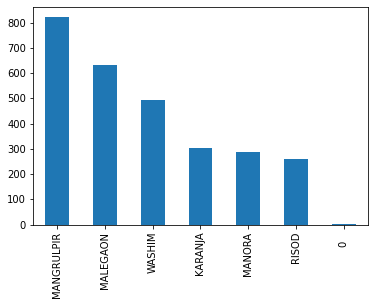

In [55]:
train['BlockName'].value_counts().plot(kind='bar')

In [56]:
set(train1.QueryType)

{'',
 'agriculture mechanization',
 'biopesticides and biofertilizers',
 'crop insurance',
 'cultural practices',
 'dairy production',
 'disease management',
 'disease reporting',
 'fertilizer use and availability',
 'field preparation',
 'government schemes',
 'market information',
 'nutrient management',
 'plant protection',
 'post harvest management cleaning grading packaging food processing cool chain etc',
 'post harvest preservation',
 'seeds',
 'seeds and planting material',
 'sowing time and weather',
 'training and exposure visits',
 'varieties',
 'water management',
 'weather',
 'weed management'}

In [57]:
train1.shape

(2800, 8)

**Following code snippit removes the nan value or ''(empty string)**

In [58]:
#Sector, Category, Crop and QueryType are replace with the values which are occured maximum times in this series
train1.Sector = (train1.Sector).replace(to_replace = '', value = 'agriculture')
train1.Category = (train1.Category).replace(to_replace = '', value = 'other')
train1.Crop = (train1.Crop).replace(to_replace = '', value = 'other')
train1.QueryType = (train1.QueryType).replace(to_replace = '', value = 'weather')
train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,agriculture,others,others,weather,maharashtra,washim,washim,2019-10-01T06:28:24.257
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019-10-01T06:36:28.063
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019-10-01T06:53:54.02
3,agriculture,fiber crops,cotton kapas,plant protection,maharashtra,washim,malegaon,2019-10-01T07:37:59.167
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019-10-01T07:47:25.36


In [59]:
#if StateName is missing, it will search the district name corrosponding to missing State Name in the 
#neighboring Series and replaces missing StateName with corrosponding state name with same district name

for i in range(len(train.StateName)):
  if train.StateName[i] == '':
    if train.DistrictName[i] != '':
      train.StateName[i] = train.StateName[list(train.DistrictName).index(train.DistrictName[i])]
    else:
      train.StateName[i] = train.StateName[i-1]
train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,agriculture,others,others,weather,maharashtra,washim,washim,2019-10-01T06:28:24.257
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019-10-01T06:36:28.063
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019-10-01T06:53:54.02
3,agriculture,fiber crops,cotton kapas,plant protection,maharashtra,washim,malegaon,2019-10-01T07:37:59.167
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019-10-01T07:47:25.36


In [60]:
#if DistrictName is missing, it will search the BlockName corrosponding to missing district in the 
#neighboring Series and replaces missing DistrictName with corrosponding DistrictName with same BlockName

for i in range(len(train.DistrictName)):
  if train.DistrictName[i] == '':
    if train.BlockName[i] != '':
      train.DistrictName[i] = train.DistrictName[list(train.BlockName).index(train.BlockName[i])]
    else:
      train.DistrictName[i] = train.DistrictName[i-1]

train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,agriculture,others,others,weather,maharashtra,washim,washim,2019-10-01T06:28:24.257
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019-10-01T06:36:28.063
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019-10-01T06:53:54.02
3,agriculture,fiber crops,cotton kapas,plant protection,maharashtra,washim,malegaon,2019-10-01T07:37:59.167
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019-10-01T07:47:25.36


In [61]:
train.shape

(2800, 11)

In [62]:
#Drop rows where QueryType is null or "" (empty str)
print("df length beforing remove rows containg empty BlockName: ", train1.shape)
train1 = train1[train1.BlockName != '']     #As there was no clue found for BlockName so row's having missing district name are droped   
print("df length after remove rows containg empty BlockName: ", train1.shape)
train1.head()

df length beforing remove rows containg empty BlockName:  (2800, 8)
df length after remove rows containg empty BlockName:  (2797, 8)


,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn
0,agriculture,others,others,weather,maharashtra,washim,washim,2019-10-01T06:28:24.257
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019-10-01T06:36:28.063
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019-10-01T06:53:54.02
3,agriculture,fiber crops,cotton kapas,plant protection,maharashtra,washim,malegaon,2019-10-01T07:37:59.167
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019-10-01T07:47:25.36


**Following Code Snippit seperates year, month, day, hour and minute from "CreatedOn" column**

In [72]:
train1['creat_year'] = train1.CreatedOn.str[:4]
train1['creat_month'] = train1.CreatedOn.str[5:7]
train1['creat_day'] = train1.CreatedOn.str[8:10]
train1['creat_hour'] = train1.CreatedOn.str[11:13]
train1['creat_minute'] = train1.CreatedOn.str[14:16]
train1 = train1.drop(['CreatedOn'], axis = 1)     #the column is droped as data is retrieved in another columns
train1.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,creat_year,creat_month,creat_day,creat_hour,creat_minute
0,agriculture,others,others,weather,maharashtra,washim,washim,2019,10,01,06,28
1,agriculture,others,others,weather,maharashtra,washim,karanja,2019,10,01,06,36
2,agriculture,others,others,weather,maharashtra,washim,malegaon,2019,10,01,06,53
3,agriculture,fiber crops,cotton kapas,plant protection,maharashtra,washim,malegaon,2019,10,01,07,37
4,horticulture,vegetables,brinjal,seeds and planting material,maharashtra,washim,washim,2019,10,01,07,47


**Following code snippit contains encoding the categorical data**

In [81]:
#One-Hot Encoding

dum_df = pd.get_dummies(train1, columns=["Sector"])
dum_df = pd.get_dummies(dum_df, columns=["Category"])
dum_df = pd.get_dummies(dum_df, columns=["Crop"])
dum_df = pd.get_dummies(dum_df, columns=["QueryType"])
dum_df = pd.get_dummies(dum_df, columns=["StateName"])
dum_df = pd.get_dummies(dum_df, columns=["DistrictName"])
dum_df = pd.get_dummies(dum_df, columns=["BlockName"])
train_Oe = dum_df
train_Oe.head()

,creat_year,creat_month,creat_day,creat_hour,creat_minute,Sector_0,Sector_1,Sector_2,Category_animal,Category_beekeeping,Category_cereals,Category_condiments and spices,Category_fiber crops,Category_flowers,Category_fruits,Category_millets,Category_oilseeds,Category_other,Category_others,Category_pulses,Category_sugar and starch crops,Category_vegetables,Crop_acid lime,Crop_beans,Crop_beekeeping,Crop_bengal gram gramchick peakabulichana,Crop_ber,Crop_bhindiokraladysfinger,Crop_bitter gourd,Crop_black gram urd bean,Crop_bovinecowbuffalo,Crop_brinjal,Crop_buffel grass anjan grass,Crop_cabbage,Crop_capsicum,Crop_carrot,Crop_castor rehri rendi arandi,Crop_cauliflower,Crop_chillies,Crop_citrus,...,Crop_safflower kusumkardi,Crop_sesame gingellytilsesamum,Crop_sorghum jowargreat millet,Crop_soybean bhat,Crop_sugarcane noble cane,Crop_tomato,Crop_turmeric,Crop_watermelon,Crop_wheat,QueryType_agriculture mechanization,QueryType_biopesticides and biofertilizers,QueryType_crop insurance,QueryType_cultural practices,QueryType_dairy production,QueryType_disease management,QueryType_disease reporting,QueryType_fertilizer use and availability,QueryType_field preparation,QueryType_government schemes,QueryType_market information,QueryType_nutrient management,QueryType_plant protection,QueryType_post harvest management cleaning grading packaging food processing cool chain etc,QueryType_post harvest preservation,QueryType_seeds,QueryType_seeds and planting material,QueryType_sowing time and weather,QueryType_training and exposure visits,QueryType_varieties,QueryType_water management,QueryType_weather,QueryType_weed management,StateName_maharashtra,DistrictName_washim,BlockName_karanja,BlockName_malegaon,BlockName_mangrulpir,BlockName_manora,BlockName_risod,BlockName_washim
0,2019,10,01,06,28,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1
1,2019,10,01,06,36,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0
2,2019,10,01,06,53,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0
3,2019,10,01,07,37,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
4,2019,10,01,07,47,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1


In [84]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

dum_df = train1
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dum_df['Sector'] = labelencoder.fit_transform(dum_df['Sector'])
dum_df['Category'] = labelencoder.fit_transform(dum_df['Category'])
dum_df['Crop'] = labelencoder.fit_transform(dum_df['Crop'])
dum_df['QueryType'] = labelencoder.fit_transform(dum_df['QueryType'])
dum_df['StateName'] = labelencoder.fit_transform(dum_df['StateName'])
dum_df['DistrictName'] = labelencoder.fit_transform(dum_df['DistrictName'])
dum_df['BlockName'] = labelencoder.fit_transform(dum_df['BlockName'])
train_Le = dum_df
train_Le.head()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,creat_year,creat_month,creat_day,creat_hour,creat_minute
0,0,10,33,21,0,0,5,2019,10,01,06,28
1,0,10,33,21,0,0,0,2019,10,01,06,36
2,0,10,33,21,0,0,1,2019,10,01,06,53
3,0,4,19,12,0,0,1,2019,10,01,07,37
4,2,13,9,16,0,0,5,2019,10,01,07,47
